<a href="https://colab.research.google.com/github/hamiin47/Assignment/blob/main/ESAA_YB_Week5_1004_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **분류**

- 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때, 미지의 레이블 값을 예측한다.
- 나이브 베이즈 / 로지스틱 회귀 / 결정트리 / 서포트 벡터 머신 / 최소 근접 알고리즘 / 신경망 / 앙상블

**앙상블 방법(Ensemble Method)**

- 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉜다.
- 배깅의 대표 방식인 랜덤 포레스트는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등을 많은 분석가들이 좋아한다.
- 부스팅의 효시라고 할 수 있는 그래디언트 부스팅의 경우 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어렵다. => 그러나 XgBoost와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시켜 활용도가 높아졌다.


**결정 트리** : 쉽고 유연하게 적용될 수 있는 알고리즘이다. 또한 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다. => 그러나 예측 성능을 향상시키기 위해서 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합이 발생하기도 한다.

**결정 노드** : 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 된다.

정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 **정보 이득 지수**와 **지니 계수**가 있다.
- 엔트로피 : 주어진 데이터 집합의 혼잡도를 의미하며 서로 다른 값이 섞여 있으며 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다.
- 정보 이득 지수 : 1에서 엔트로피 지수를 뺀 값이다. 이때 정보 이득이 높은 속성을 기준으로 분할한다.
- 지니 계산 : 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

**결정 트리 모델의 특징**은
알고리즘이 쉽고 직관적이며, 정보의 균일도만 신경을 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없다. *그러나*  과적합으로 알고리즘의 성능이 떨어지기도 하며 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요하다.

**결정 트리 파라미터의 종류**
- min_samples_split
- min_samples_leaf
- max_features  
- max_depth
- max_leaf_nodes

**결정 트리 모델의 시각화** : Graphviz 패키지 이용


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

사이킷런의 트리 모듈은 Graphviz를 이용하기 위해 export_graphviz() 함수를 제공한다.

export_graphviz()는 Graphviz가 읽어 들여서 그래프 형태로 시각화 할 수 있는 출력 파일을 생성한다.  

In [5]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

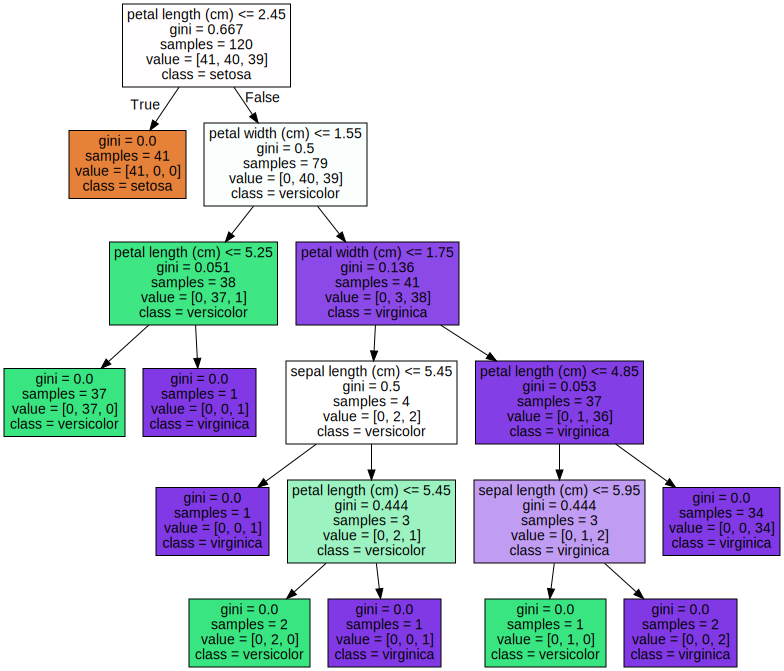

In [6]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

더 이상 자식 노드가 없는 노드는 리프 노드이다.
리프 노드는 최종 클래스 값이 결정되는 노드이다.


리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다.



*   petal length (cm) <= 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건(없으면 리프노드)
*   gini : value=[]로 주어진 데이터 분포에서의 지니 계수이다.
*   samples : 현 규칙에 해당하는 데이터 건수
*   value=[] : 클래스 값 기반의 데이터 건수

===========

[2번 노드] : 모든 데이터가 Setosa로 결정되므로 클래스가 결정된 리프 노드가 되고 더 이상 2번 노드에서 규칙을 만들 필요가 없다.

[3번 노드] : 79개의 샘플 데이터 중 Versicolor 40, Virginica 39개로 여전리 지니 계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙이 필요하다

[4번 노드] : 지니 계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virginica가 혼재돼 있으므로 petal length라는 새로운 규칙으로 다시 자식 노드 생성

[5번 노드] : 지니 계수는 0.136으로 여전히 낮으나 Versicolor와 Virginica가 혼재되어 있으므로 petal length라는 새로운 규칙으로 다시 자식 노드 생성





**min_sapmles_splits**는 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수이다.

더 이상 분할될 수 없는 리프 노드는 클래스 결정 값이 되는데, **min_samples_leaf**는 분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수를 지정한다.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

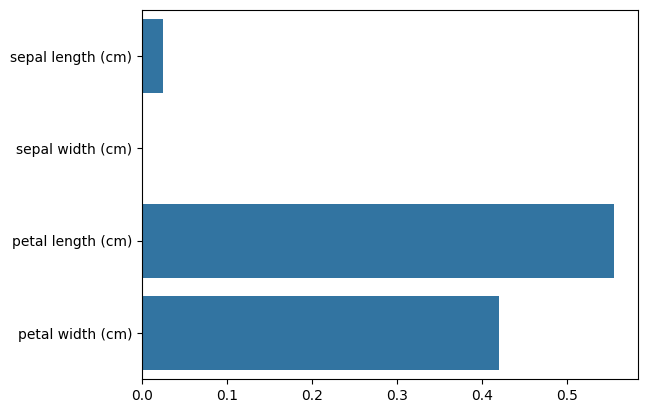

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

**결정 트리 과적합(Overfitting)**

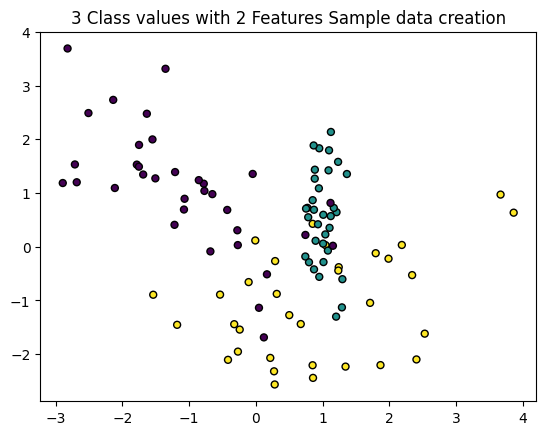

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Classifier의 Decision Boundary를 시각화 하는 함수 정의
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


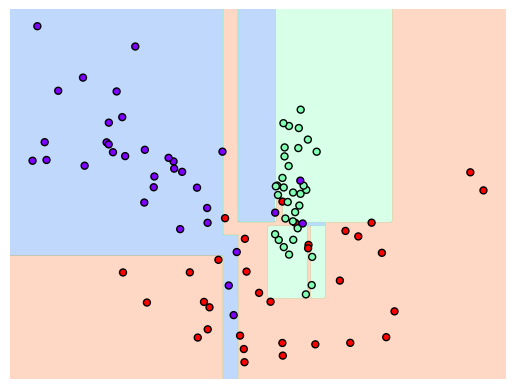

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

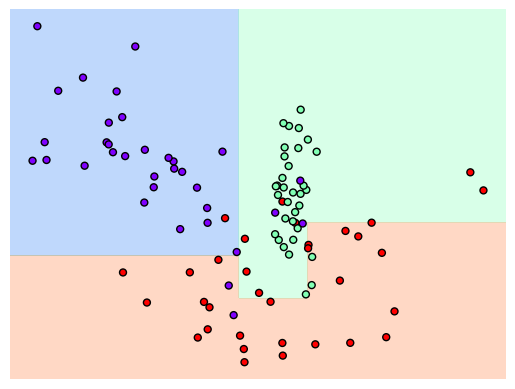

In [11]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('/content/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [13]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [14]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merger(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [15]:
import pandas as pd

# 중복된 피처 이름에 고유 번호를 붙여주는 함수
def get_new_feature_name_df(feature_name_df):
    feature_name_df_copy = feature_name_df.copy()
    # 특수 문자 제거 (괄호, 대시 등을 제거)
    feature_name_df_copy['column_name'] = feature_name_df_copy['column_name'].str.replace('[()]', '', regex=True).str.replace('-', '_')

    # 중복된 피처 이름 처리: 중복된 피처 이름에 숫자 접미사 추가
    feature_names = feature_name_df_copy['column_name']
    duplicates = feature_names[feature_names.duplicated(keep=False)]  # 중복된 이름 찾기
    counts = {}  # 이름별 중복 횟수 카운팅

    for idx, name in enumerate(feature_names):
        if name in counts:
            counts[name] += 1
            feature_names[idx] = f"{name}_{counts[name]}"  # 중복되면 접미사 붙이기
        else:
            counts[name] = 0  # 처음 등장한 경우 0으로 설정

    feature_name_df_copy['column_name'] = feature_names
    return feature_name_df_copy

def get_human_dataset():
  # 'features.txt' 파일에서 피처 이름을 불러옴
  feature_name_df = pd.read_csv('/content/features.txt',sep='\s+', header=None, names=['column_index', 'column_name'])

  # 피처 이름을 정리하는 함수 호출 (중복 해결)
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # 피처 이름을 리스트로 변환
  feature_name = new_feature_name_df['column_name'].values.tolist()

  # 학습 데이터와 테스트 데이터를 피처 이름을 칼럼으로 해서 불러옴
  X_train = pd.read_csv('/content/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블을 불러옴
  y_train = pd.read_csv('/content/y_train.txt',sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/y_test.txt',sep='\s+', header=None, names=['action'])

  return X_train, X_test, y_train, y_test

# 함수 실행
X_train, X_test, y_train, y_test = get_human_dataset()


In [16]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc_mean_X to angleZ,gravityMean
dtypes: float64(561)
memory usage: 31.5 MB
None


In [17]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


약 85%의 정확도

In [19]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


정확도는 약 85%

In [20]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [21]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))


max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [22]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [23]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))


결정 트리 예측 정확도: 0.8717


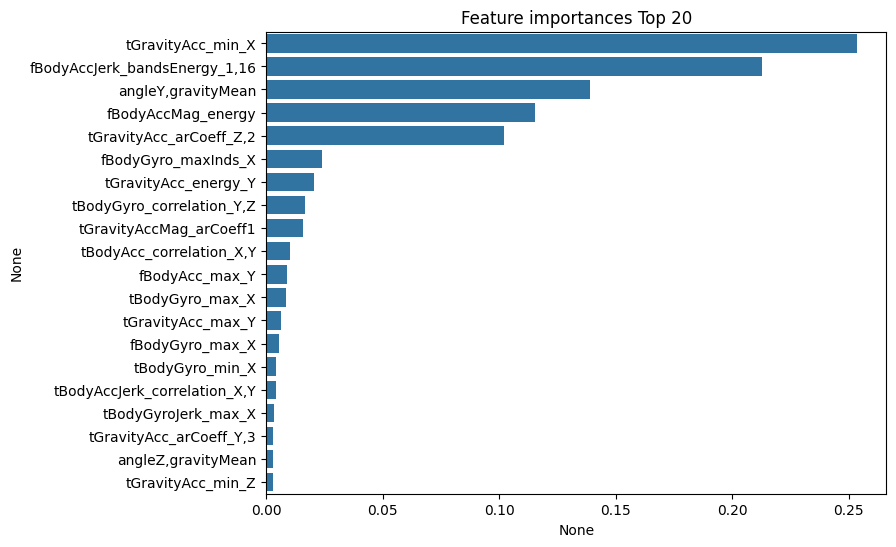

In [24]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()